In [1]:
import numpy as np
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("titanic_train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


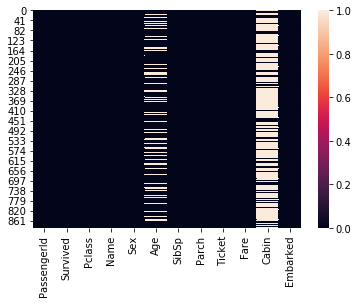

In [7]:
sns.heatmap(df.isnull())

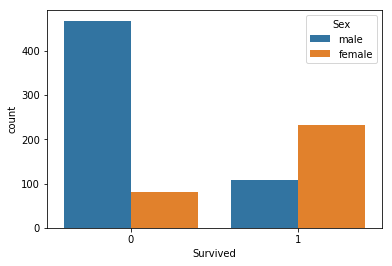

In [12]:
sns.countplot(df["Survived"] , hue=df["Sex"])

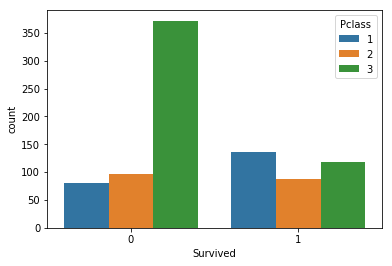

In [13]:
sns.countplot(df["Survived"] , hue=df["Pclass"])

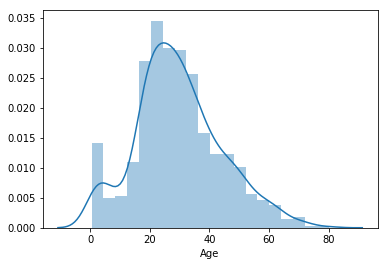

In [17]:
sns.distplot(df["Age"].dropna() , kde= "False")

In [18]:
df.info(x = )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


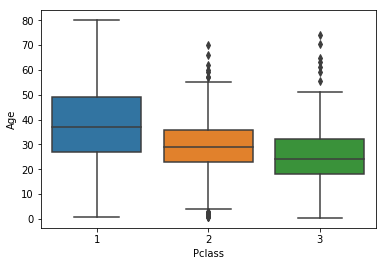

In [21]:
sns.boxplot(x ="Pclass" , y = "Age" , data=df )

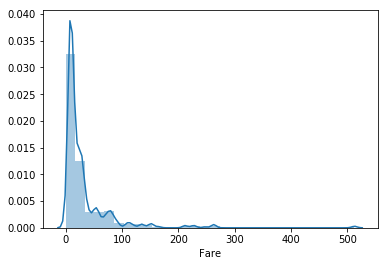

In [20]:
sns.distplot(df["Fare"] , bins=30)

In [24]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    if(df["Age"].isnull):
        if(pclass ==1):
            return 37
        elif(pclass ==2):
            return 30
        else:
            return 27
        
            
            

In [25]:
df["Age"] = df[["Age","Pclass"]].apply(impute_age , axis = 1 )

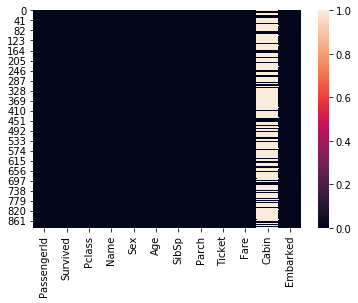

In [27]:
sns.heatmap(df.isnull())

In [31]:
df.drop("Cabin",axis=1 , inplace = True)

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,27,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,27,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,27,0,0,373450,8.0500,S


In [37]:
sex =pd.get_dummies(df["Sex"],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [38]:
embark =pd.get_dummies(df["Embarked"], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [39]:
df = pd.concat([df , sex , embark], axis=1)

In [40]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,27,1,0,A/5 21171,7.25,S,1,0,1


In [42]:
df.drop(["Sex","Name","Ticket", "Embarked"] ,axis = 1 , inplace=True)
df.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,27,1,0,7.2500,1,0,1
1,2,1,1,37,1,0,71.2833,0,0,0
2,3,1,3,27,0,0,7.9250,0,0,1


In [46]:
df.drop("PassengerId" , axis=1 , inplace=True)

In [47]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,27,1,0,7.2500,1,0,1
1,1,1,37,1,0,71.2833,0,0,0
2,1,3,27,0,0,7.9250,0,0,1
3,1,1,37,1,0,53.1000,0,0,1
4,0,3,27,0,0,8.0500,1,0,1


In [52]:
X = df.drop("Survived" , axis=1)

In [55]:
y = df["Survived"]

In [57]:
from sklearn.cross_validation import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.4 , random_state= 101);

In [58]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [59]:
logmodel.fit(X_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
predict = logmodel.predict(X_test)

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

             precision    recall  f1-score   support

          0       0.79      0.88      0.83       207
          1       0.80      0.68      0.74       150

avg / total       0.80      0.80      0.79       357



In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test , predict)

array([[182,  25],
       [ 48, 102]], dtype=int64)